<a href="https://colab.research.google.com/github/MonkeyWrenchGang/PythonBootcamp/blob/main/Week_4_Seaborn_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn Basics

Seaborn is a "more-better" visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics.

**Basic Structure of a Seaborn Plot:**

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Set the default seaborn style
sns.set()

# Basic Structure
plt.figure(figsize=(8, 6))
sns.<plot_type>(x, y_optional, <plot options>)
plt.title('Plot Title')
plt.xlabel('x-axis label')
plt.ylabel('y-axis label')
plt.show()
```
- `sns.set()`: Set the default seaborn style to enhance the visual appearance of the plots.

- `plt.figure(figsize=(8, 6))`: Create a new figure object with a specified figure size. The figsize parameter sets the width and height of the figure in inches.

- `sns.<plot_type>(x, y_optional, <plot options>)`: Choose a specific seaborn plotting function, such as sns.lineplot(), sns.scatterplot(), sns.barplot(), or others, depending on your visualization needs.

- `plt.title('Plot Title')`: Set the title of the plot.

- `plt.xlabel('x-axis label')`: Set the label for the x-axis.

- `plt.ylabel('y-axis label')`: Set the label for the y-axis.

- `plt.show()`: Display the plot in the notebook. This line is necessary to visualize the plot.

- `plt.savefig('filename.extension')`: Save the plot to the specified file in the current working directory or the path you provide. Matplotlib supports a wide range of file formats, and it determines the appropriate format based on the file extension you specify.

In [ ]:
coffee.describe()

,purchase_last_90days_count,Price,promo_redemption
count,9775.000000,9775.000000,9775.000000
mean,43.360409,7.328721,0.211969
std,16.798190,7.450666,0.408724
min,0.000000,2.490000,0.000000
25%,29.000000,4.490000,0.000000
50%,42.000000,5.990000,0.000000
75%,58.000000,6.990000,0.000000
max,89.000000,59.990000,1.000000


In [ ]:
coffee['Price'].mean()

7.3287212276214815

In [ ]:
coffee.groupby('')

## Start with Some Data!

Let's import two datasets our AirBnB data and a MSFT dataset.

| Column Name                          | Description                                                     |
|--------------------------------------|-----------------------------------------------------------------|
| id                                   | The unique identifier for each listing                          |
| name                                 | The name or title of the listing                                |
| host_id                              | The unique identifier for the host associated with the listing   |
| host_name                            | The name of the host                                            |
| neighbourhood_group                  | The neighborhood group where the listing is located (if available) |
| neighbourhood                        | The specific neighborhood where the listing is situated         |
| latitude                             | The latitude coordinate of the listing's location               |
| longitude                            | The longitude coordinate of the listing's location              |
| room_type                            | The type of accommodation offered (e.g., entire home/apartment, private room, shared room) |
| price                                | The price per night for booking the listing                     |
| minimum_nights                       | The minimum number of nights required for booking               |
| number_of_reviews                    | The total number of reviews received for the listing            |
| last_review                          | The date of the last review                                     |
| reviews_per_month                    | The average number of reviews received per month                |
| calculated_host_listings_count       | The total number of listings managed by the host                |
| availability_365                     | The number of days the listing is available for booking within the next 365 days |
| number_of_reviews_ltm                | The number of reviews received in the last twelve months        |
| license                              | License information (if available)                              |


To get started visualizing the Airbnb accommodations available in San Diego. we need to first import it.

1. import libraries
```python
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
```

1. import coffee promo redemptions into a dataframe called `coffee`
```
"https://raw.githubusercontent.com/MonkeyWrenchGang/PythonBootcamp/main/day_5/data/coffee_sales.csv"
```

2. import the following CSV into a dataframe called `abnb`
```
"https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_3/data/sd_listings.csv"
```
3. import microsoft prices CSV into a dataframe called `msft`
```
https://raw.githubusercontent.com/MonkeyWrenchGang/PythonBootcamp/main/day_4/data/msft_data.csv
```




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [ ]:
coffee = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/PythonBootcamp/main/day_5/data/coffee_sales.csv")
coffee.head()

,purchase_last_90days_count,instore_yn,location_city,product_name,transaction_timestamp,barista_name,Item,Price,promo_redemption
0,65,Yes,Key West,Hot chocolate: Snow Day Hot Chocolate,2022-12-16T18:24:39Z,Scarlett,Hot chocolate: Snow Day Hot Chocolate,6.99,0
1,65,Yes,Key West,Barista Espresso: Cappuccino Lg,2022-11-01T14:15:33Z,Savannah,Barista Espresso: Cappuccino Lg,5.99,1
2,58,No,Key West,Drip coffee: Our Old Time Diner Blend Sm,2023-04-07T01:17:45Z,Nova,Drip coffee: Our Old Time Diner Blend Sm,2.99,0
3,31,Yes,Key West,Gourmet brewed coffee: Columbian Medium Roast Lg,2022-08-05T20:56:10Z,Stella,Gourmet brewed coffee: Columbian Medium Roast Lg,6.99,0
4,31,Yes,Key West,Brewed Black tea: English Breakfast Rg,2023-03-20T04:04:21Z,Ivy,Brewed Black tea: English Breakfast Rg,3.99,0


In [ ]:
coffee.groupby('location_city')[['Price']].agg(['mean','count'])

Price      
                   mean count
location_city                
Jacksonville   7.777529   433
Key West       7.392033  6640
Miami          7.280928  1973
Orlando        6.855079    63
Tampa          6.592102   666

In [ ]:
abnb = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_3/data/sd_listings.csv")
msft = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/PythonBootcamp/main/day_4/data/msft_data.csv")

## Histograms

A histogram is a graphical representation of the distribution of a dataset. It provides a visual summary of the **frequency or count** of values falling within specified intervals, called bins. Histograms are commonly used to understand the underlying distribution and patterns in numerical data.



---


To create a histogram in Python using Seaborn we use the `.histplot()` funciton:

```python
plt.figure(figsize=(8, 6))
sns.histplot(dat=<>,x=<> bins=<>)
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

```

- `data` represents the dataset.
- `x` is the column we want to plot
- `bins` determines the number of bins (intervals) to divide the data range into.


Ex 1. make a histogram of coffee 'purchase_last_90days_count'



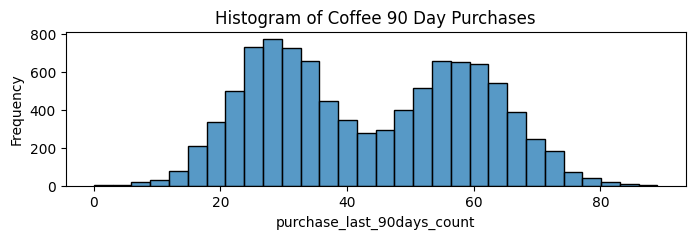

In [ ]:
plt.figure(figsize=(8, 2))
sns.histplot(data=coffee, x='purchase_last_90days_count', bins=30)
plt.title('Histogram of Coffee 90 Day Purchases')
plt.xlabel('purchase_last_90days_count')
plt.ylabel('Frequency')
plt.show()

## Interesting two humps

The hue parameter in Seaborn allows you to differentiate and group data points based on a categorical variable. It is particularly useful when you want to visualize the relationship between multiple variables while considering a third categorical variable.

add `hue='promo_redemption'` to your plot above.

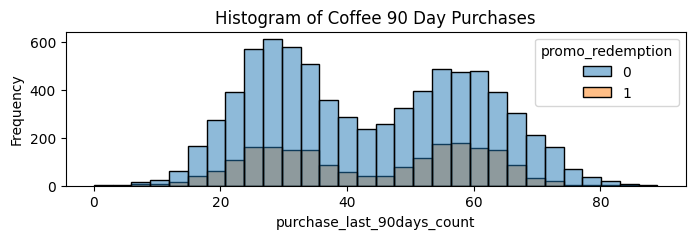

In [ ]:
plt.figure(figsize=(8, 2))
sns.histplot(data=coffee,
             x='purchase_last_90days_count',
             hue='promo_redemption',
             bins=30)
plt.title('Histogram of Coffee 90 Day Purchases')
plt.xlabel('purchase_last_90days_count')
plt.ylabel('Frequency')
plt.show()

## Boxplots

A boxplot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It provides a concise summary of the data's central tendency, spread, and skewness.

Basic Boxplot Template

To create a boxplot in Python using Seaborn we use the `.boxplot()` and `.boxenplot()` funciton:

```python

plt.figure(figsize=(8, 6))
sns.boxplot(data, x=, y=, notch=True, )
plt.title('Boxplot of Single Column')
plt.xlabel('Series')
plt.ylabel('Value')
plt.show()
```

simply compare y='purchase_last_90days_count',
             x='promo_redemption' to see if there is a difference?

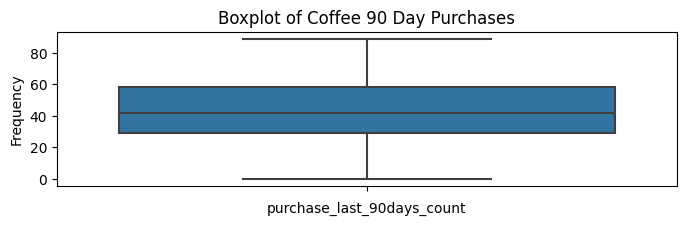

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=coffee,
             y='purchase_last_90days_count',
             #x='promo_redemption',
             )
plt.title('Boxplot of Coffee 90 Day Purchases')
plt.xlabel('purchase_last_90days_count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
coffee['hot_flag'] = coffee['product_name'].str.contains('Hot')


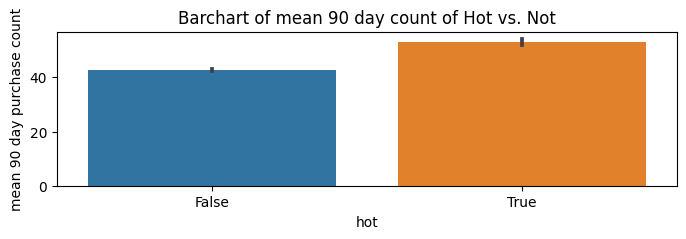

In [ ]:
plt.figure(figsize=(8, 2))
sns.barplot(data=coffee,x='hot_flag',y="purchase_last_90days_count")
plt.title('Barchart of mean 90 day count of Hot vs. Not')
plt.xlabel('hot')
plt.ylabel('mean 90 day purchase count')
plt.show()

# Boxplot No. 2 setup with ABNB

In [ ]:
# make series objects
lajolla = abnb.query("neighbourhood == 'La Jolla' and minimum_nights == 2 and price < 1000" )['price']
missionbay = abnb.query("neighbourhood == 'Mission Bay' and minimum_nights == 2 and price < 1000")['price']
gaslamp = abnb.query("neighbourhood == 'Gaslamp Quarter' and minimum_nights == 2 and price < 1000")['price']
# make a list_of_series
plot_data =  [lajolla, missionbay, gaslamp]


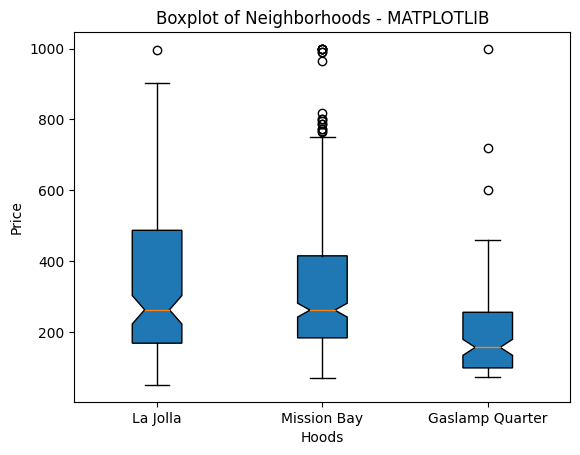

In [ ]:
# configure boxplot
plt.boxplot(plot_data, labels=['La Jolla', 'Mission Bay', 'Gaslamp Quarter'], notch=True, patch_artist=True)
plt.title('Boxplot of Neighborhoods - MATPLOTLIB')
plt.xlabel('Hoods')
plt.ylabel('Price')
plt.show()

## Try w. Seaborn

Here we only need to filter for minimum_nights == 2 and price < 1000 and neighbourhood == ['La Jolla', 'Mission Bay', 'Gaslamp Quarter'] then plot

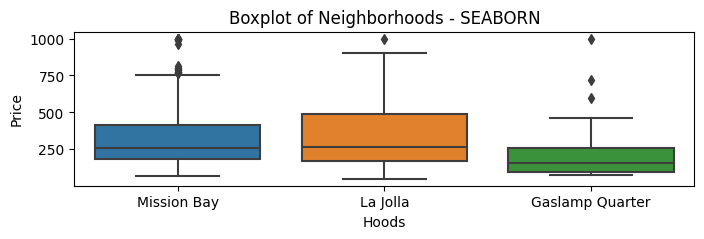

In [ ]:
res = abnb.query("minimum_nights == 2 and price < 1000 and neighbourhood in ['La Jolla', 'Mission Bay', 'Gaslamp Quarter']")
plt.figure(figsize=(8, 2))
sns.boxplot(data=res,
             y='price',
             x='neighbourhood',
             )
plt.title('Boxplot of Neighborhoods - SEABORN')
plt.xlabel('Hoods')
plt.ylabel('Price')
plt.show()

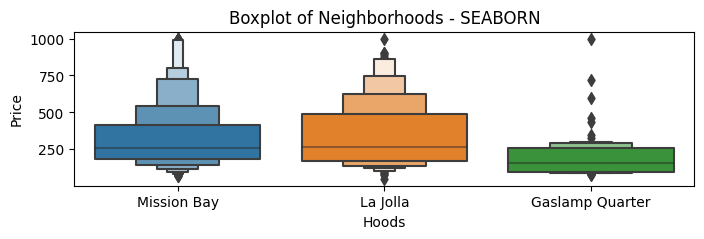

In [ ]:
#res = abnb.query("minimum_nights == 2 and price < 1000 and neighbourhood in ['La Jolla', 'Mission Bay', 'Gaslamp Quarter']")
plt.figure(figsize=(8, 2))
sns.boxenplot(data=res,
             y='price',
             x='neighbourhood',
             )
plt.title('Boxplot of Neighborhoods - SEABORN')
plt.xlabel('Hoods')
plt.ylabel('Price')
plt.show()

# Count Plot


---

The countplot function from Seaborn takes the DataFrame and the column name as its parameters.

- x-axis represents the categories
- y-axis represents the count of observations in each category.

> Seaborn **automatically counts** the occurrences of each category and creates the countplot.

THIS IS HOW TO DO a SIMPLE FREQUENCY PLOT


## Countplot w. Hue

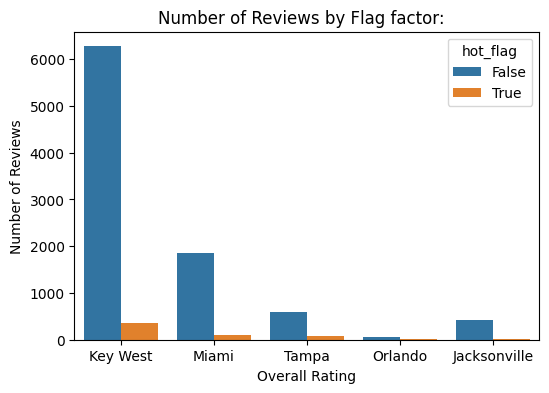

In [ ]:
plt.figure(figsize=(6, 4))
factor = 'good_flag'
#sns.barplot(data=coffee,x='hot_flag',y="purchase_last_90days_count")

sns.countplot(data=coffee, x="location_city", hue='hot_flag')
plt.title('Number of Reviews by Flag factor:  ')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
coffee

,purchase_last_90days_count,instore_yn,location_city,product_name,transaction_timestamp,barista_name,Item,Price,promo_redemption,hot_flag
0,65,Yes,Key West,Hot chocolate: Snow Day Hot Chocolate,2022-12-16T18:24:39Z,Scarlett,Hot chocolate: Snow Day Hot Chocolate,6.99,0,True
1,65,Yes,Key West,Barista Espresso: Cappuccino Lg,2022-11-01T14:15:33Z,Savannah,Barista Espresso: Cappuccino Lg,5.99,1,False
2,58,No,Key West,Drip coffee: Our Old Time Diner Blend Sm,2023-04-07T01:17:45Z,Nova,Drip coffee: Our Old Time Diner Blend Sm,2.99,0,False
3,31,Yes,Key West,Gourmet brewed coffee: Columbian Medium Roast Lg,2022-08-05T20:56:10Z,Stella,Gourmet brewed coffee: Columbian Medium Roast Lg,6.99,0,False
4,31,Yes,Key West,Brewed Black tea: English Breakfast Rg,2023-03-20T04:04:21Z,Ivy,Brewed Black tea: English Breakfast Rg,3.99,0,False
...,...,...,...,...,...,...,...,...,...,...
9770,58,Yes,Key West,Regular syrup: Carmel syrup,2023-05-30T09:57:17Z,Stella,Regular syrup: Carmel syrup,3.99,0,False
9771,47,No,Key West,Premium brewed coffee: Jamaican Coffee River Lg,2022-10-19T13:20:04Z,Nova,Premium brewed coffee: Jamaican Coffee River Lg,7.99,0,False
9772,36,Yes,Key West,Organic Beans: Organic Decaf Blend,2022-09-25T15:49:53Z,Luna,Organic Beans: Organic Decaf Blend,10.99,0,False
9773,26,No,Miami,Scone: Cranberry Scone,2022-07-22T18:46:06Z,Aria,Scone: Cranberry Scone,3.49,0,False


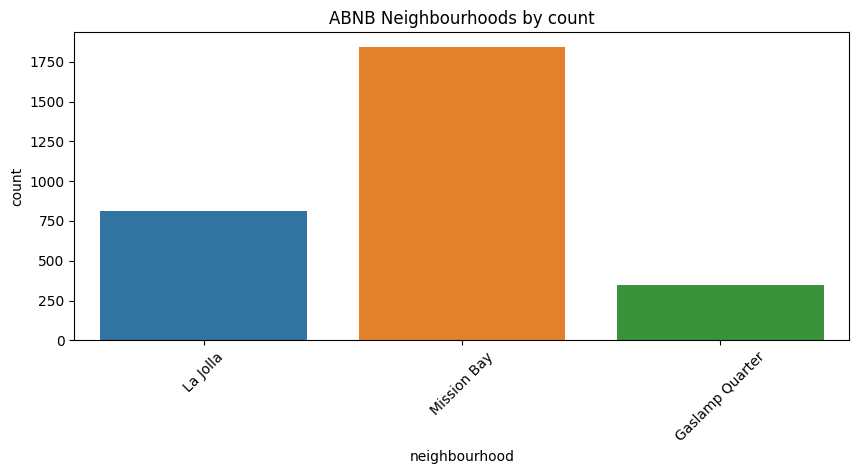

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=abnb.query("neighbourhood in ['La Jolla', 'Mission Bay', 'Gaslamp Quarter']"),
            x="neighbourhood",
           )
plt.title('ABNB Neighbourhoods by count')
plt.xlabel('neighbourhood')
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.ylabel('count')
plt.show()

## Bar Charts

A bar chart, also known as a bar graph, is a visualization that presents categorical data using rectangular bars. It is commonly used to compare and display the values of different categories or groups.

Here is the barchart template 🇰

```python
plt.figure(figsize=(8, 6))
sns.barplot(data=, x=, y=)
plt.title('Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')

```
- x represents the categories or groups
- y represents the corresponding values.
- color sets the color of the bars.

## Basic Recipe

1. presummarize and sort your data, into a data frame with a category and a numeric value ex: neighboorhood & frequency
2. fill in the barchart template

## Exericse Property Count by Neighboor hood

1. create a dataframe by counting id by neighbourhood
2. reset the index
3. rename id to "count"
4. use nlargest to create a top_10 dataset of neighbourhood
5. fill in the barchart template

YES it's a lot!

In [ ]:
# 1. create a dataframe by counting id by neighbourhood
ex1 = abnb.groupby('neighbourhood')[['id']].count()
# 2. reset the index
ex1 = ex1.reset_index()
# 3. rename
ex1.columns = ["neighbourhood","count"]
# 4. use nlargest to create a top_10
top_10 = ex1.nlargest(10,"count")
top_10

,neighbourhood,count
54,Mission Bay,1843
69,Pacific Beach,1007
41,La Jolla,812
24,East Village,749
66,Ocean Beach,609
63,North Hills,601
51,Midtown,563
33,Gaslamp Quarter,348
47,Loma Portal,348
67,Old Town,267


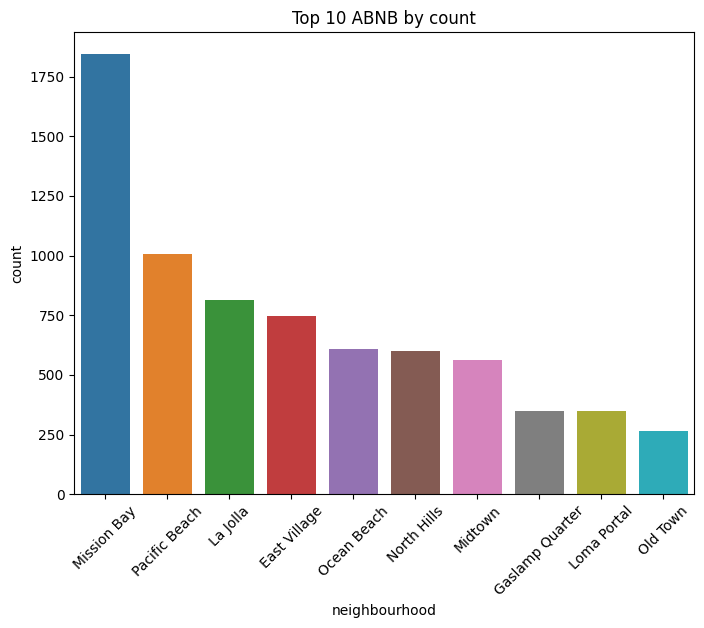

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top_10,
            x="neighbourhood",
            y="count")
plt.title('Top 10 ABNB by count')
plt.xlabel('neighbourhood')
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.ylabel('count')
plt.show()

# Microsoft Stock!



---

Using the msft data from 2023, let's create a scatterplot of  `Close` by `Open` (x=Open y=Close)

## scatterplot:
1. create a result set by filter for Date >= 2023-01-01
2. use result set to create scatterplot

Seaborn Template:

```python
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='X', y='Y')
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

```


In [ ]:
msft.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1369,2023-06-12,328.579987,332.100006,325.160004,331.850006,331.850006,24260300
1370,2023-06-13,334.470001,336.980011,330.390015,334.290009,334.290009,22951300
1371,2023-06-14,334.339996,339.040009,332.809998,337.339996,337.339996,26003800
1372,2023-06-15,337.480011,349.839996,337.200012,348.100006,348.100006,38899100
1373,2023-06-16,351.320007,351.470001,341.950012,342.329987,342.329987,46533600


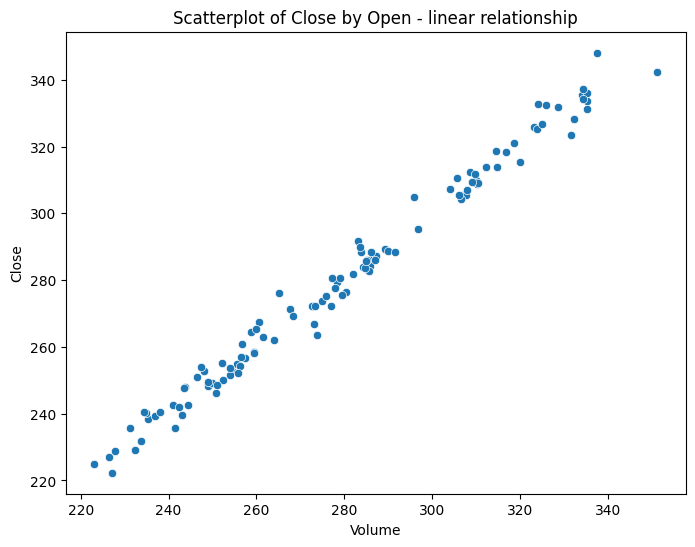

In [ ]:
plt.figure(figsize=(8, 6))
result = msft.query('Date >= "2023-01-01"').copy()
sns.scatterplot(data=result, x='Open', y='Close')
#sns.scatterplot(result['Volume'], result['Close'], marker='o', color='steelblue')
plt.title('Scatterplot of Close by Open - linear relationship')
plt.xlabel('Volume')
plt.ylabel('Close')
#plt.legend(['Legend'])
plt.show()

## Trading Strategy Opportunity?

what happens if you buy the open and sell the close?

In [ ]:
msft["close_minus_open"] = msft['Close'] - msft['Open']

In [ ]:
msft["close_minus_open"].mean()

0.0740537685077784

In [ ]:
result = msft.query('Date >= "2023-01-01"').copy()
result["close_minus_open"].mean()

0.5405216382897372

## Create indicator

if >= 0 then "positive"
if < 0 then "negative"

In [ ]:
import numpy as np

msft["drawdown"] = np.where(msft["close_minus_open"] >=0,"positive","negative")

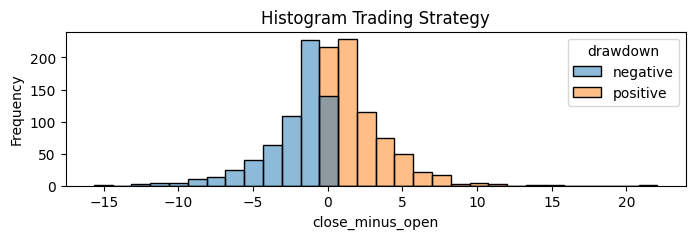

In [ ]:
plt.figure(figsize=(8, 2))
sns.histplot(data=msft,
             x='close_minus_open',
             hue='drawdown',
             bins=30)
plt.title('Histogram Trading Strategy')
plt.xlabel('close_minus_open')
plt.ylabel('Frequency')
plt.show()

## Lineplot :
1. create a result set by filter for Date >= 2023-01-01
2. use result set to create lineplot using plot()

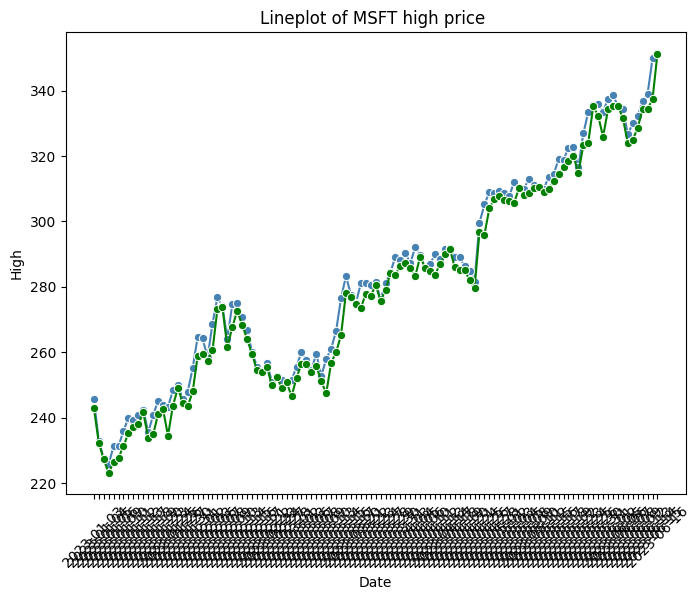

In [ ]:

plt.figure(figsize=(8, 6))
sns.lineplot(result, x = "Date", y="High", marker='o', linestyle='-', color='steelblue')
sns.lineplot(result, x = "Date", y="Open", marker='o', linestyle='-', color='green')

plt.title('Lineplot of MSFT high price ')
plt.xlabel('Date')
plt.ylabel('High')
plt.xticks(rotation=45)


plt.show()


# Fix the X-Axis

When working with dates on the x-axis of your plots, the `matplotlib.dates` module aka `mdates` provides tools for formatting and customizing the appearance of the dates.

The DateFormatter class allows you to specify the format of dates using various format codes to represent the year, month, day, hour, minute, and more. For example, %b %Y represents the abbreviated month followed by the four-digit year.

- `%Y`: Four-digit year (e.g., 2023)
- `%y`: Two-digit year (e.g., 23)
- `%m`: Month as a zero-padded decimal number (e.g., 01 for January)
- `%b`: Abbreviated month name (e.g., Jan)
- `%B`: Full month name (e.g., January)
- `%d`: Day of the month as a zero-padded decimal number (e.g., 01)
- `%w`: Weekday as a decimal number, where Sunday is 0 and Saturday is 6
- `%W`: Week number of the year as a decimal number, with Monday as the first day of the week (e.g., 00 to 53)



> the MonthLocator class comes in handyhelps determine the locations where the major ticks will be placed, such as at the beginning of each month. This ensures that the x-axis displays a **single date for each month**, enhancing readability.

The `plt.gca().xaxis.set_major_locator()` and `plt.gca().xaxis.set_major_formatter()` functions in Matplotlib provide convenient ways to customize the major tick positions and formatting of the x-axis.

- `set_major_locator()` is used to specify where the major tick marks should appear on the x-axis.

- `set_major_formatter()` is used to define how the major tick labels should be formatted on the x-axis.

To make use of these functions, you can call `plt.gca().xaxis.set_major_locator()` to set the desired tick positions on the x-axis, and then use `plt.gca().xaxis.set_major_formatter()` to format the tick labels accordingly.

> gca() stands for get current axis



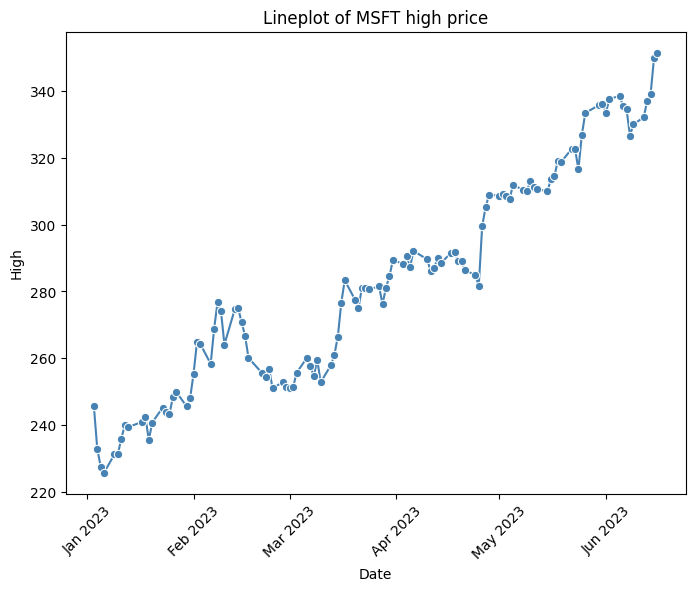

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

result["Date"] = pd.to_datetime(result["Date"])

plt.figure(figsize=(8, 6))
sns.lineplot(result, x = "Date", y="High", marker='o', linestyle='-', color='steelblue')
plt.title('Lineplot of MSFT high price')
plt.xlabel('Date')
plt.ylabel('High')

# Format x-axis to show only the month
months = mdates.MonthLocator()
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.show()
